# 📋 Variable description
---

**Customer_id** = unique customer id

**Age** = customer's age

**Gender** = 0: Male, 1: Female

**Revenue_Total** = total sales by customer

**N_Purchases** = number of purchases to date

**Purchase_DATE** = date latest purchase, dd.mm.yy

**Purchase_VALUE** = latest purchase in €

**Pay_Method** = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other

**Time_Spent** = time spent (in sec) on website

**Browser** = 0: Chrome, 1: Safari, 2: Edge, 3: Other

**Newsletter** = 0: not subscribed, 1: subscribed

**Voucher** = 0: not used, 1: used

# 📚 Imports
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📖 Data
---

In [2]:
df = pd.read_csv('data/Online Shop Customer Sales Data.csv')

In [3]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_id,65796.0,537205.500000,18993.813493,504308.000,520756.75000,537205.50,553654.250,570103.0
Age,65796.0,39.592696,13.825466,16.000,28.00000,40.00,51.000,63.0
Gender,65796.0,0.671348,0.469727,0.000,0.00000,1.00,1.000,1.0
Revenue_Total,65796.0,27.732935,14.941878,0.500,15.30000,30.10,37.600,59.9
N_Purchases,65796.0,3.992477,2.004370,1.000,2.00000,4.00,6.000,7.0
Purchase_VALUE,65796.0,15.968699,13.229295,0.005,4.81975,12.64,24.752,59.9
Pay_Method,65796.0,1.308651,1.081959,0.000,0.00000,1.00,2.000,3.0
Time_Spent,65796.0,598.925603,277.833635,120.000,358.00000,598.00,840.000,1080.0
Browser,65796.0,0.630935,0.996407,0.000,0.00000,0.00,1.000,3.0
Newsletter,65796.0,0.151027,0.358078,0.000,0.00000,0.00,0.000,1.0


In [6]:
# Checking null values
df.isna().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [7]:
# Random sampling

proportion_sample = 0.1

# Calculate the sample size based on the proportion
sample_size = int(len(df) * proportion_sample)

# Perform random sampling based on the sample size
sample = df.sample(n=sample_size, random_state=0)

# Display the sample
print(sample)

       Customer_id  Age  Gender  Revenue_Total  N_Purchases Purchase_DATE  \
19885       524193   41       1           52.1            6      11.11.21   
62543       566851   16       1            5.0            1      19.07.21   
30120       534428   28       0           32.7            7      01.01.22   
2857        507165   54       1           34.9            4      03.07.21   
10009       514317   48       1           28.8            5      07.12.21   
...            ...  ...     ...            ...          ...           ...   
12711       517019   43       1           26.7            4      11.03.21   
61864       566172   17       0           30.2            7      24.01.21   
57936       562244   25       0           31.9            6      14.10.21   
3663        507971   49       1           16.2            2      27.08.21   
47522       551830   56       1            6.7            2      30.09.21   

       Purchase_VALUE  Pay_Method  Time_Spent  Browser  Newsletter  Voucher

In [8]:
# Drop Customer_id
df.drop('Customer_id', axis = 1, inplace = True)

# Splitting the date into month and year
df['Month'] = df['Purchase_DATE'].str.split('.').str[1]
df['Year'] = df['Purchase_DATE'].str.split('.').str[2]

df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Drop Purchase_DATE
df.drop('Purchase_DATE', axis = 1, inplace = True)

In [9]:
df.head()

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,53,0,45.3,2,24.915,1,885,0,0,0,6,21
1,18,1,36.2,3,2.896,2,656,0,0,1,12,21
2,52,1,10.6,1,10.600,0,761,0,1,0,3,21
3,29,0,54.1,5,43.280,1,906,0,1,0,10,21
4,21,1,56.9,1,56.900,1,605,0,1,0,9,21


# 🔎 Identifying and excluding outliers 🗑
---

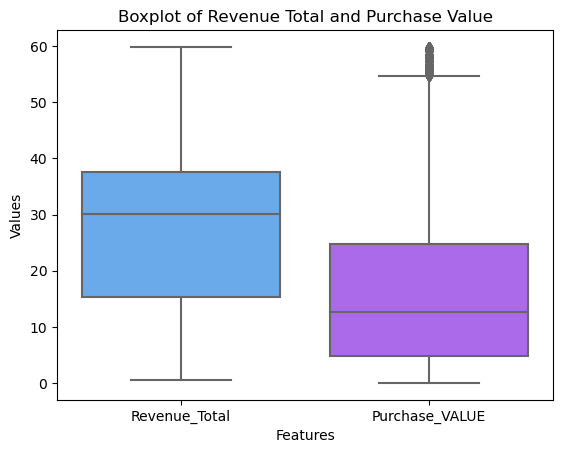

In [11]:
# Create the boxplot
sns.boxplot(data = df[['Revenue_Total', 'Purchase_VALUE']], palette = 'cool')

# Set the title/labels
plt.title('Boxplot of Revenue Total and Purchase Value')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

I will use **z-score** to exclude outliers.

The z-score is calculated by the difference between the specific value and the mean of the data set, divided by the standard deviation of the data set. The formula for calculating the z-score is as follows:

z = (x - μ) / σ

**where:**

**x** is the specific value

**μ** is the mean of the data set

**σ** is the standard deviation of the data set

In [12]:
# Calculate the mean and std
mean = np.mean(df['Purchase_VALUE'])
std = np.std(df['Purchase_VALUE'])

# Calculate the Z-score
z_scores = (df['Purchase_VALUE'] - mean) / std

# Set a Z-score threshold
threshold = 3

# Identify the indices of the outliers based on the Z-score threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Drop the outliers
df.drop(df.index[outlier_indices], inplace = True)

# 📊 Visualization
---

# Distribution of variables
---

<Figure size 1500x2800 with 0 Axes>

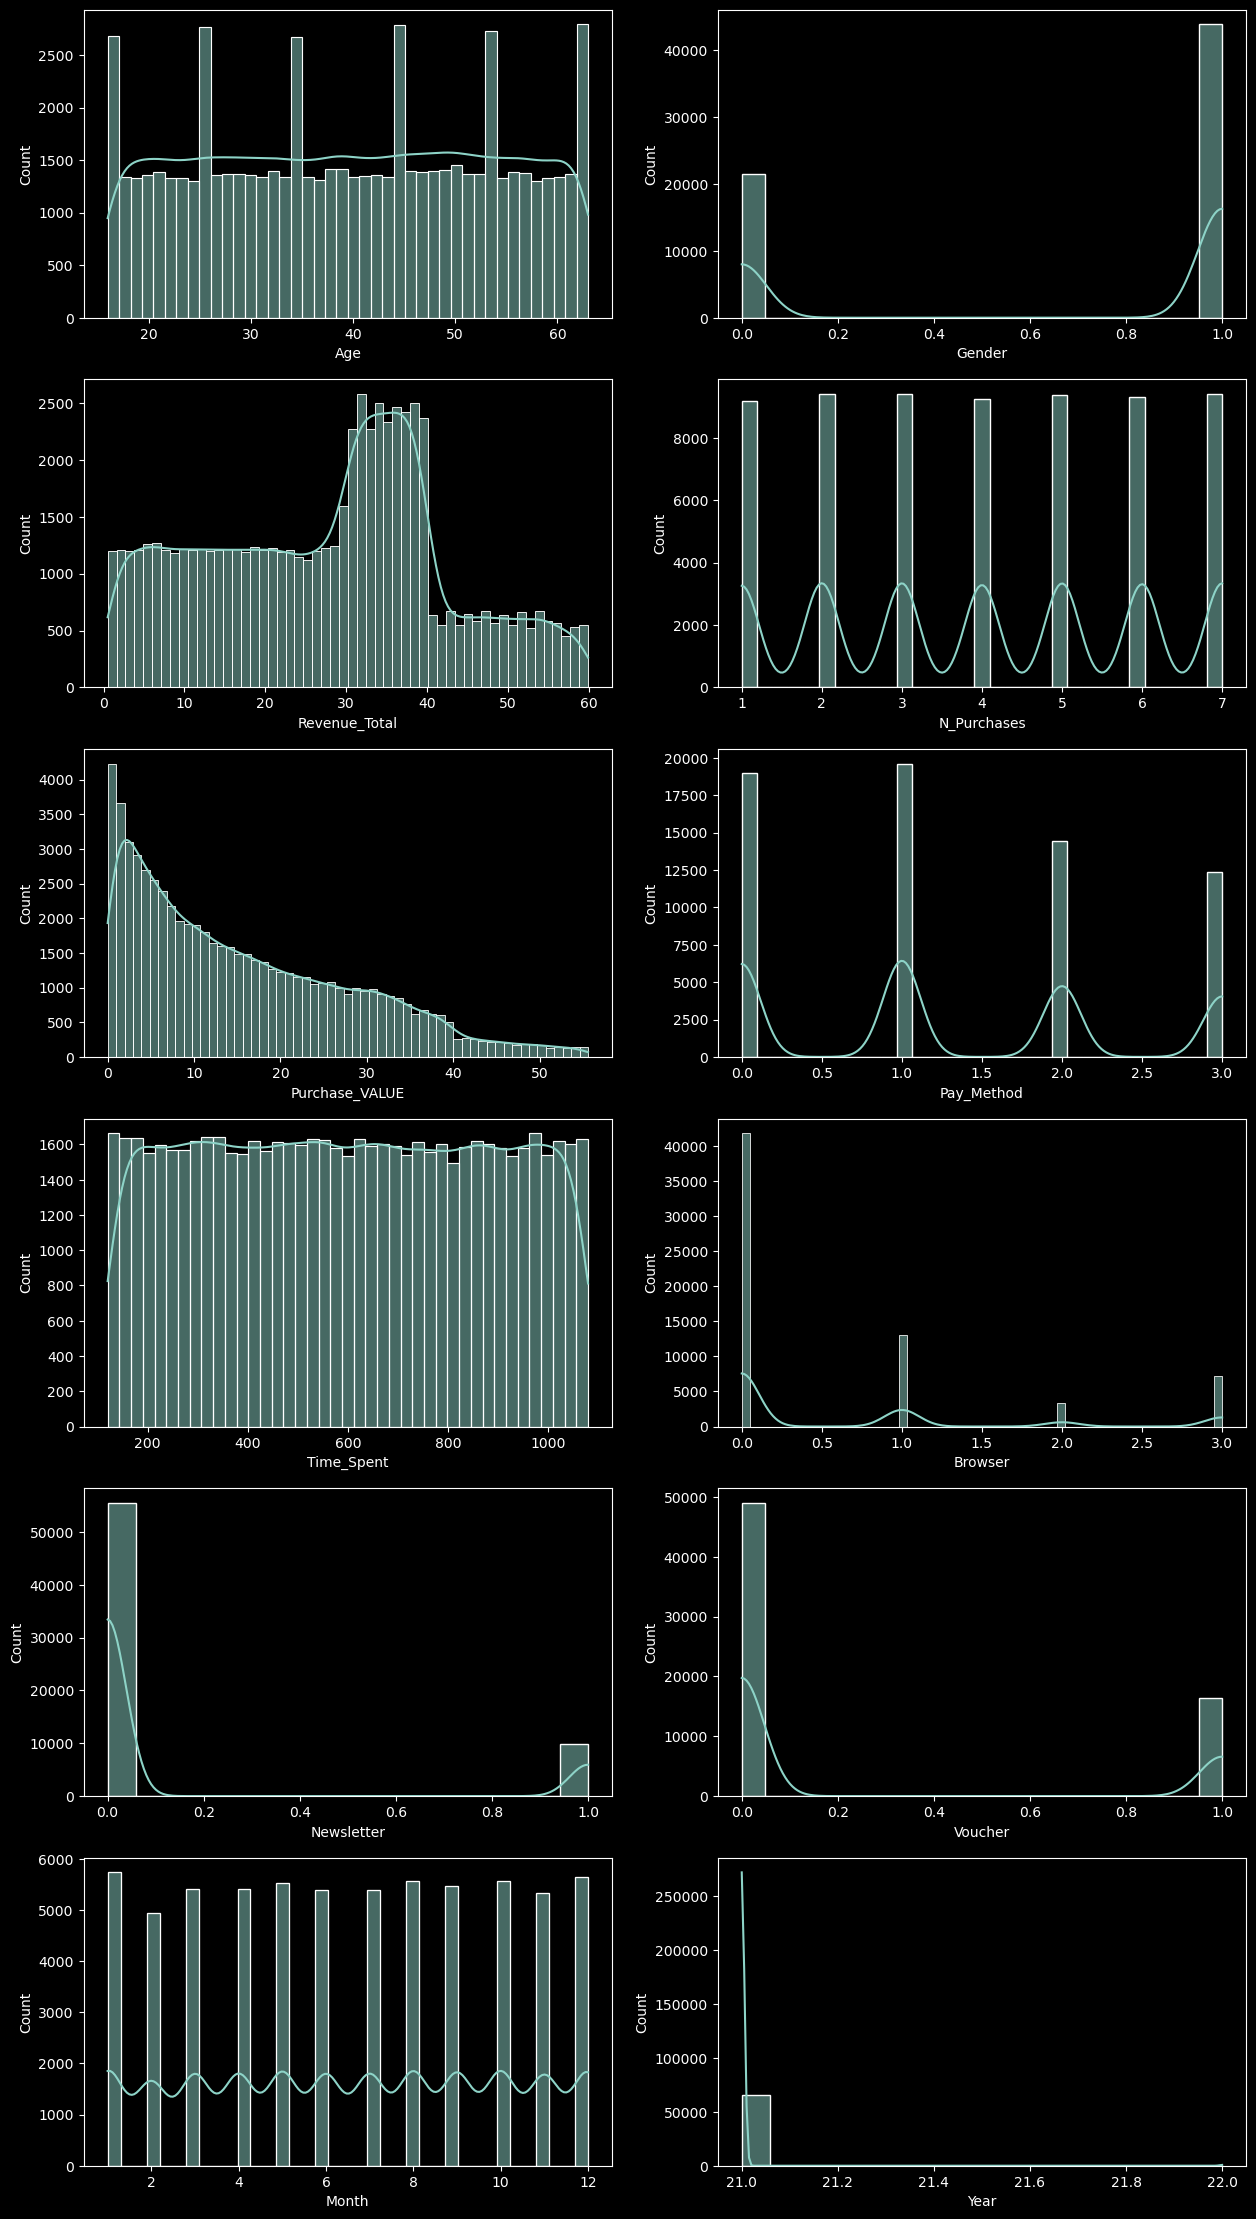

In [13]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (15, 28))

# Adjust subplot vertical spacing
plt.subplots_adjust(hspace = 0.2)

# 6x2 subplot figure
fig, axs = plt.subplots(6, 2, figsize=(15, 28))

i = 1
# Loop through dataframe columns
for feature in df.columns:
    # Create a subplot
    plt.subplot(6, 2, i)
    # Create histogram
    sns.histplot(data = df, x = feature, kde = True, palette = 'cool')
    i += 1
    
# Show the plot
plt.show()


##  ♂️ Gender Distribution ♀️
---

<Figure size 1000x600 with 0 Axes>

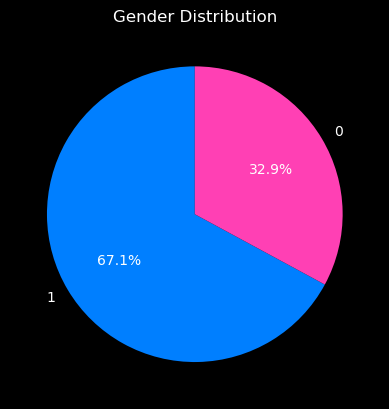

In [14]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Gender value count
gender_counts = df['Gender'].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#007fff', '#FF40B4'])

# Add title and show
ax.set_title('Gender Distribution')
plt.show()

## 👶 Age by Gender 👴
---

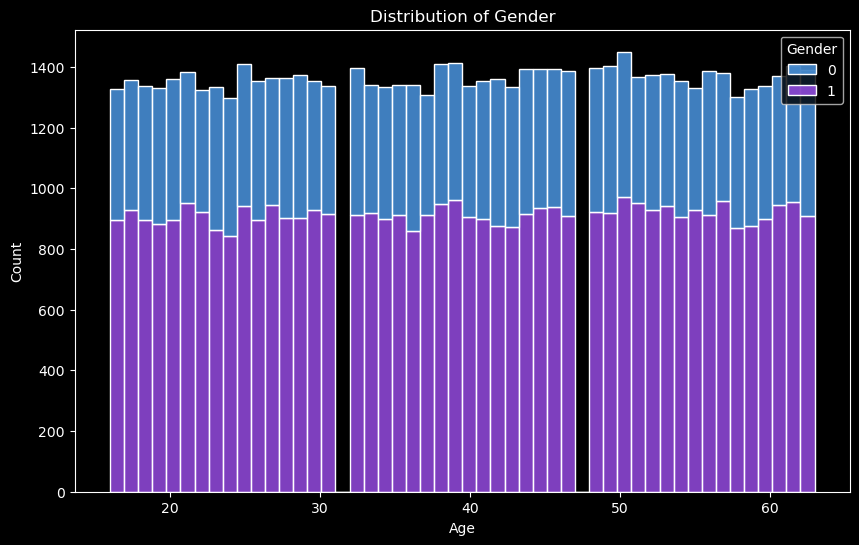

In [15]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create histogram
sns.histplot(x = 'Age', hue = 'Gender', multiple = 'stack', bins = 50, data = df, palette = 'cool')

# Customize the title and labels
plt.title('Distribution of Gender')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

## Revenue Total by Gender
---

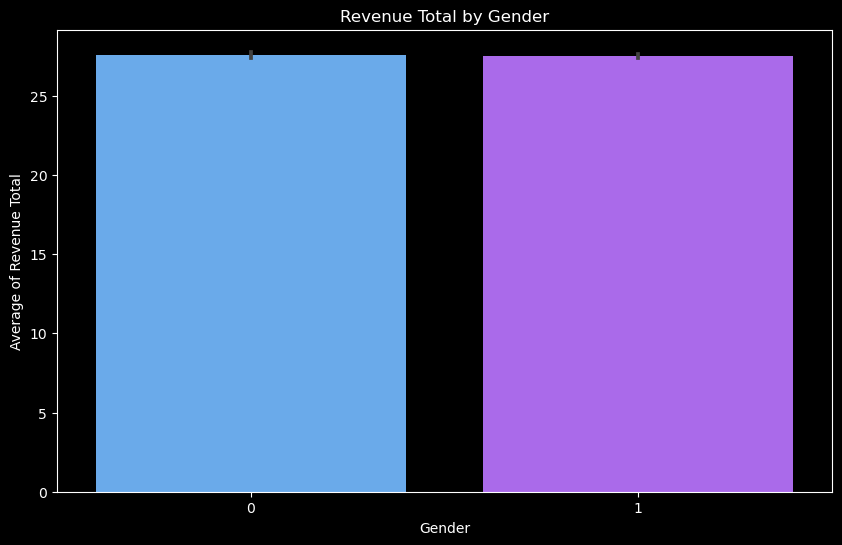

In [17]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Gender', y = 'Revenue_Total', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Gender')
plt.ylabel('Average of Revenue Total')
plt.title('Revenue Total by Gender')

plt.show()

## 💵 Pay Method Distribution
---

<Figure size 1000x600 with 0 Axes>

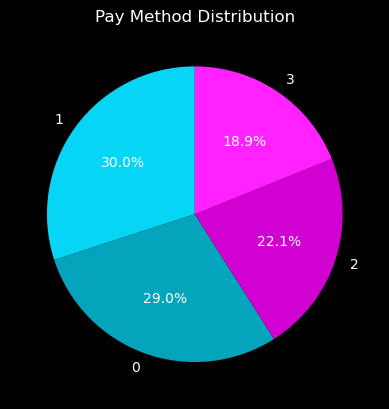

In [18]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Gender value count
pay_method_counts = df['Pay_Method'].value_counts()

# Set colors
colors = ['#07d5f5','#04a4bd', '#d102d1',  '#ff21ff']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(pay_method_counts, labels = pay_method_counts.index, autopct = '%1.1f%%', startangle = 90, colors = colors)

# Add title and show
ax.set_title('Pay Method Distribution')
plt.show()

## 💻 Browser Distribution
---

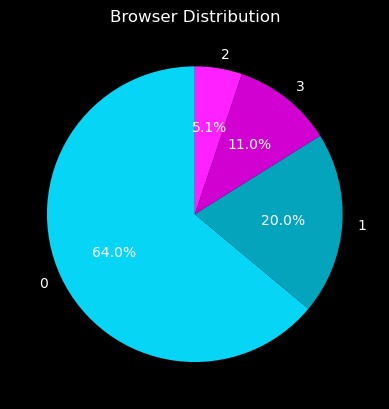

In [38]:
# Browser value count
browser_count = df['Browser'].value_counts()

# Set colors
colors = ['#07d5f5','#04a4bd', '#d102d1',  '#ff21ff']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(browser_count, labels = browser_count.index, autopct = '%1.1f%%', startangle = 90, colors = colors)

# Add title and show
ax.set_title('Browser Distribution')
plt.show()

## 📰 Newsletter Distribution
---

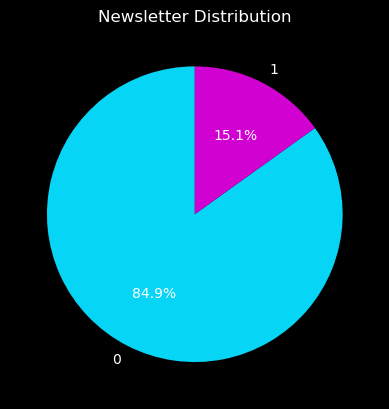

In [44]:
# Newsletter value count
newsletter_count = df['Newsletter'].value_counts()

# Set colors
colors = ['#07d5f5','#d102d1']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(newsletter_count, labels = newsletter_count.index, autopct = '%1.1f%%', startangle = 90, colors = colors)

# Add title and show
ax.set_title('Newsletter Distribution')
plt.show()

## ✔️ Voucher Distribution
---

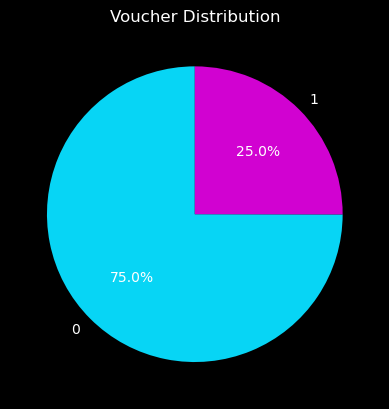

In [45]:
# Vouncher value count
voucher_count = df['Voucher'].value_counts()

# Set colors
colors = ['#07d5f5','#d102d1']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(voucher_count, labels = voucher_count.index, autopct = '%1.1f%%', startangle = 90, colors = colors)

# Add title and show
ax.set_title('Voucher Distribution')
plt.show()

## Purchase Value by Payment Method
---

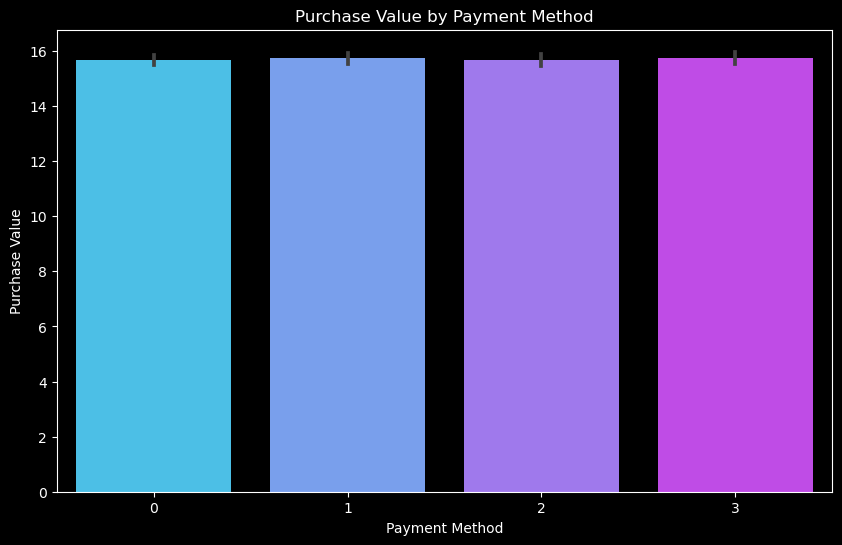

In [19]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Barplot
sns.barplot(x = 'Pay_Method', y = 'Purchase_VALUE', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Payment Method')
plt.ylabel('Purchase Value')
plt.title('Purchase Value by Payment Method')

plt.show()

## Revenue Total by Number of Purchases
---

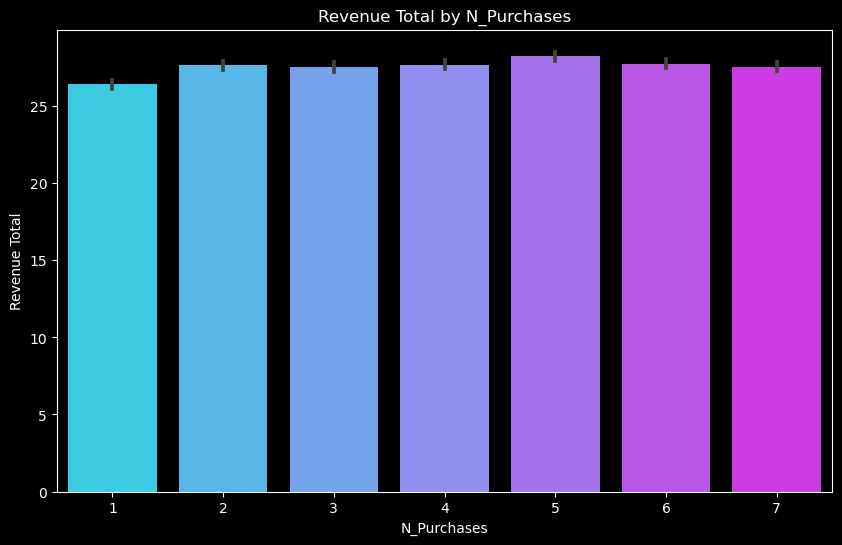

In [20]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'N_Purchases', y = 'Revenue_Total', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('N_Purchases')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Number of Purchases')

plt.show()

## Revenue Total by Browser
---

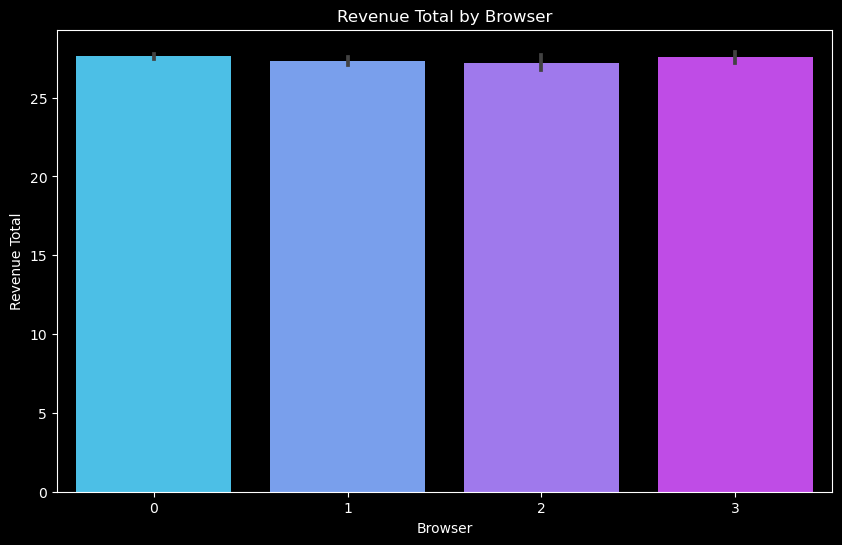

In [21]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Browser', y = 'Revenue_Total', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Browser')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Browser')

plt.show()

## Revenue Total by Newsletter
---

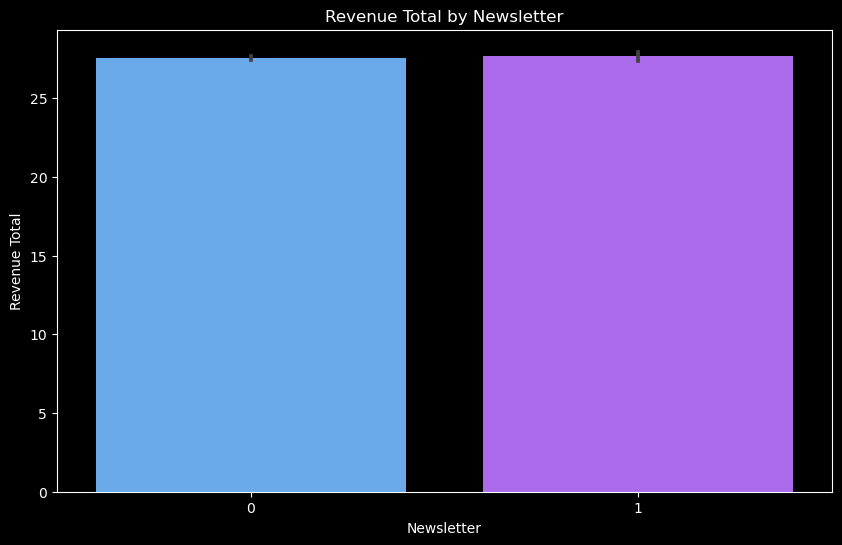

In [22]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Newsletter', y = 'Revenue_Total', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Newsletter')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Newsletter')

plt.show()

## Revenue Total by Voucher
---

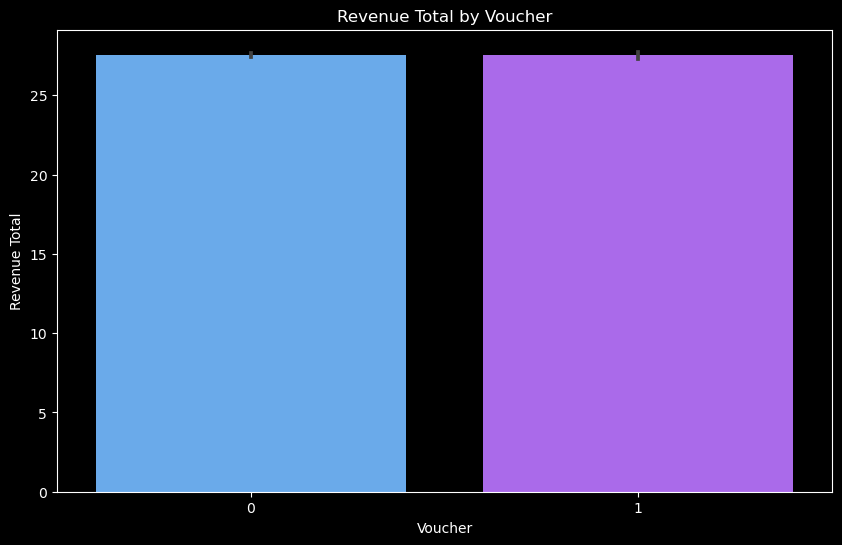

In [23]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Voucher', y = 'Revenue_Total', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Voucher')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Voucher')

plt.show()

## Time Spent by Browser
---

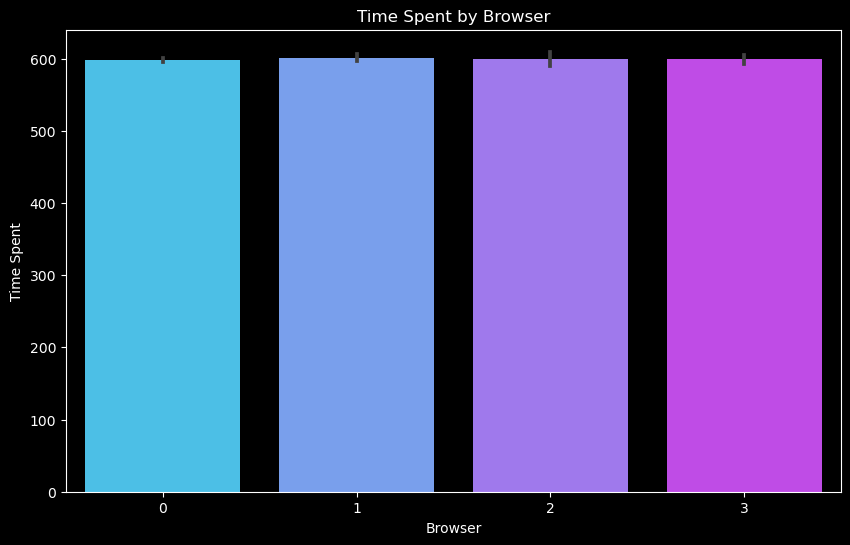

In [24]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Browser', y = 'Time_Spent', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Browser')
plt.ylabel('Time Spent')
plt.title('Time Spent by Browser')

plt.show()

## Time Spent by Voucher
---

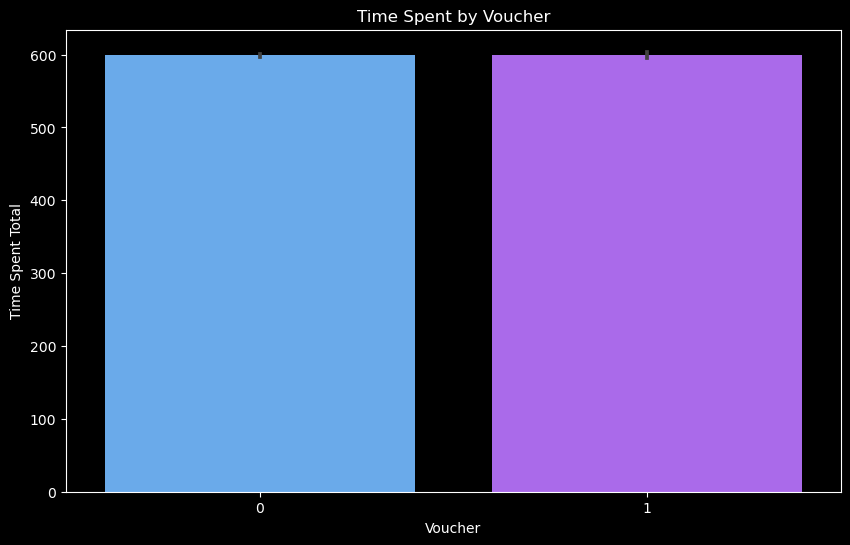

In [25]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Voucher', y = 'Time_Spent', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Voucher')
plt.ylabel('Time Spent Total')
plt.title('Time Spent by Voucher')

plt.show()

## Time Spent by Newsletter
---

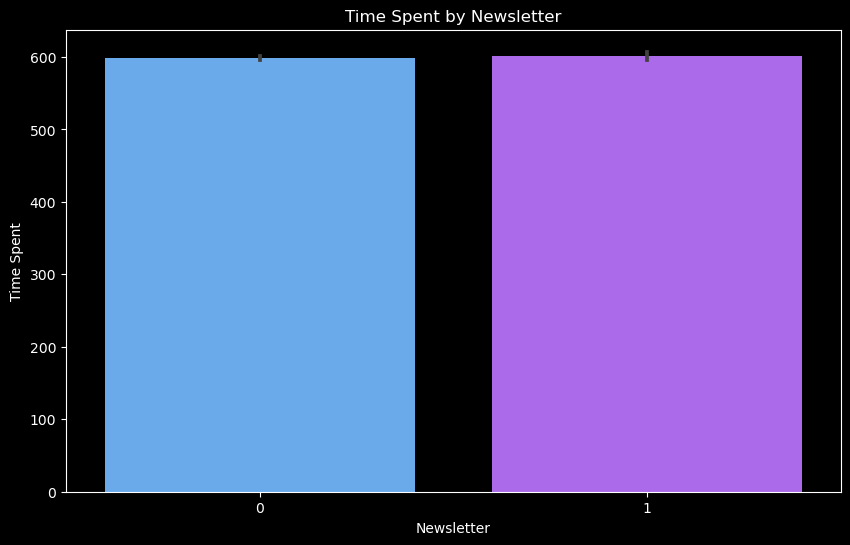

In [26]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Newsletter', y = 'Time_Spent', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Newsletter')
plt.ylabel('Time Spent')
plt.title('Time Spent by Newsletter')

plt.show()

## Distribution of Purchase Value by Gender
---

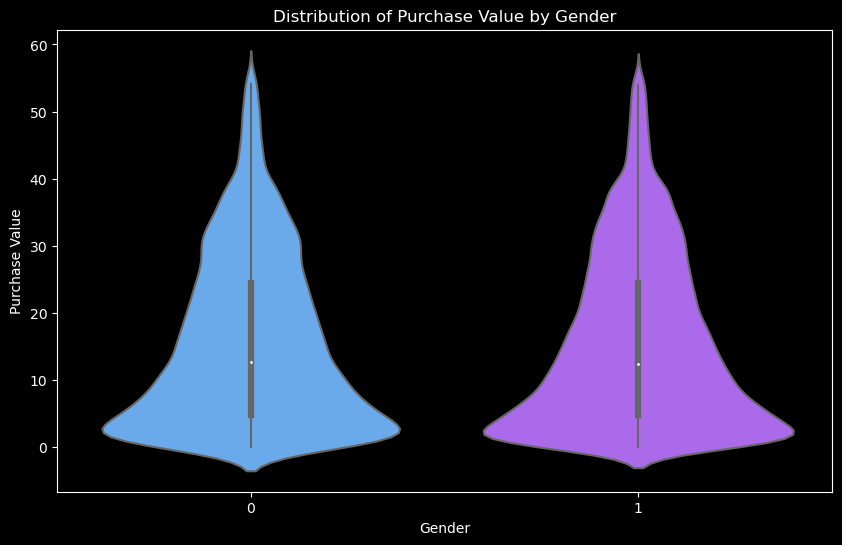

In [27]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create the Violin plot
sns.violinplot(x = 'Gender', y = 'Purchase_VALUE', data = df, palette = 'cool')

# Set the axis and title
plt.title('Distribution of Purchase Value by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Value')

plt.show()

## Distribution of Revenue Total by Gender
---

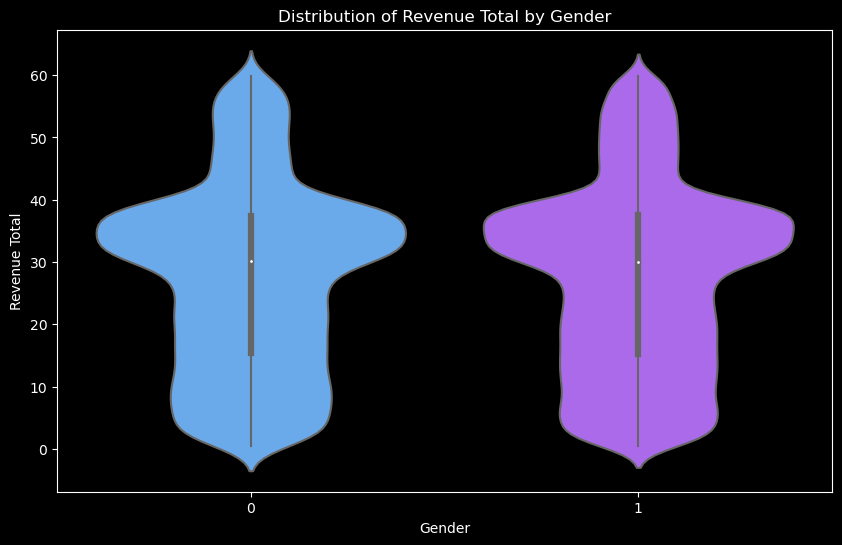

In [28]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Create the Violin plot
sns.violinplot(x = 'Gender', y = 'Revenue_Total', data = df, palette = 'cool')

# Set the axis and title
plt.title('Distribution of Revenue Total by Gender')
plt.xlabel('Gender')
plt.ylabel('Revenue Total')

plt.show()

## Purchase Value by Gender
---

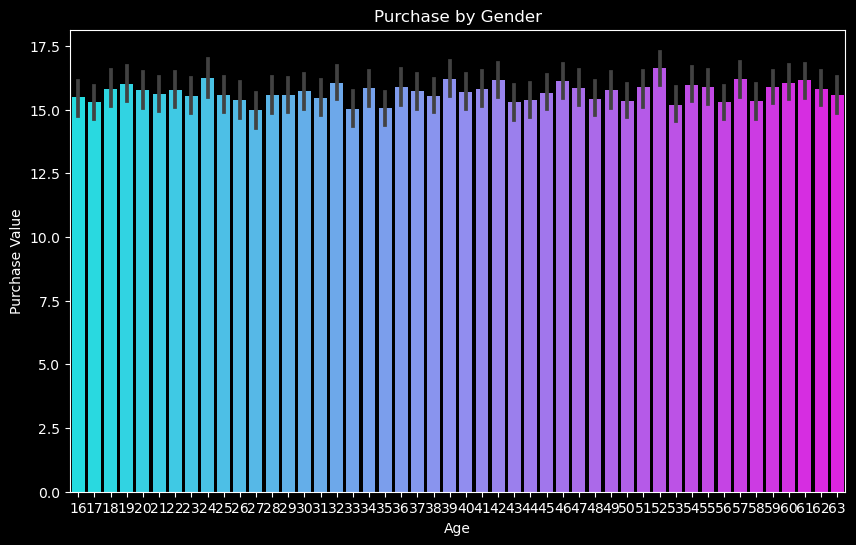

In [29]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Age', y = 'Purchase_VALUE', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.title('Purchase by Gender')

plt.show()

## Revenue Total by Gender
---

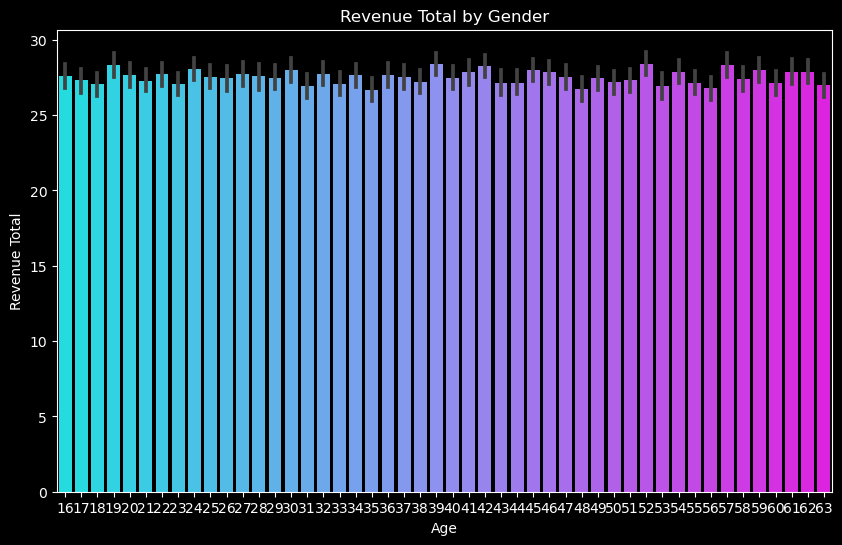

In [30]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Bar plot
sns.barplot(x = 'Age', y = 'Revenue_Total', data = df, palette = 'cool')

# Labels/Title
plt.xlabel('Age')
plt.ylabel('Revenue Total')
plt.title('Revenue Total by Gender')

plt.show()

## Monthly Revenue Analysis
---

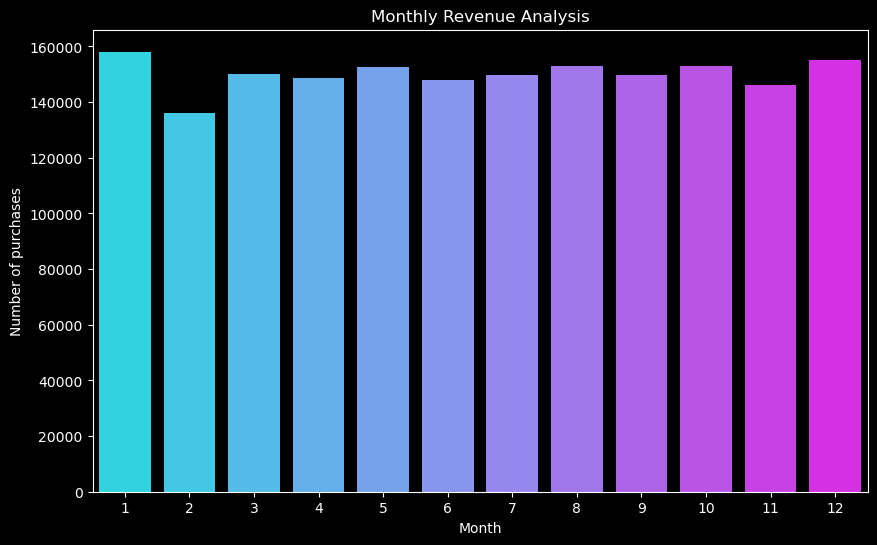

In [31]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Grouping
grouped_df = df.groupby('Month').sum()[['Revenue_Total','N_Purchases']]

# Sorting the dataframe by 'Revenue_Total'
sorted_df = grouped_df.sort_values(by = 'Revenue_Total', ascending = False)

# Creating a bar chart
sns.barplot(x = sorted_df.index, y = 'Revenue_Total', data = sorted_df, palette = 'cool')

# Set labels/title
plt.xlabel('Month')
plt.ylabel('Number of purchases')
plt.title('Monthly Revenue Analysis')

plt.show()

## Revenue Total vs Time Spent
---

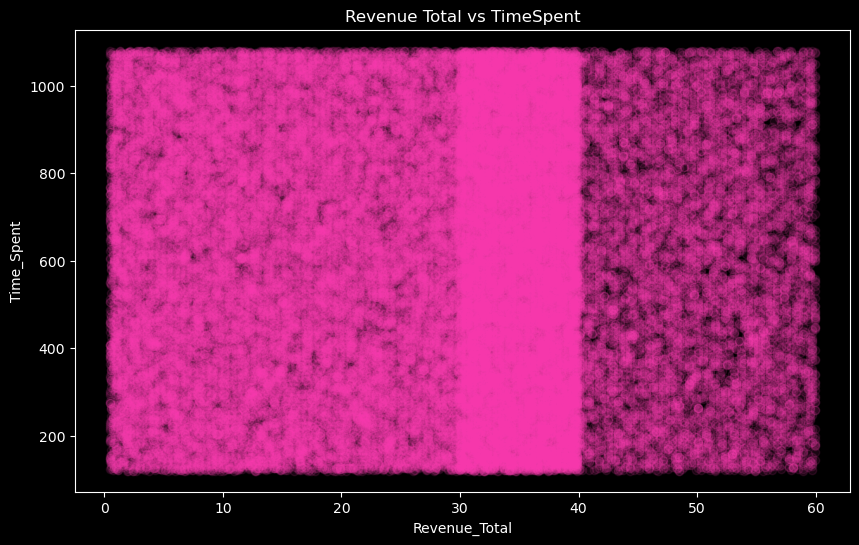

In [32]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Set line color
color = '#FF40B4'

# Create the scatter plot
plt.scatter(df['Revenue_Total'], df['Time_Spent'], color = color, alpha = 0.1)

# Set the axis labels
plt.xlabel('Revenue_Total')
plt.ylabel('Time_Spent')

# Set the title
plt.title('Revenue Total vs TimeSpent')
plt.show()

## Purshase Value vs Time Spent
---

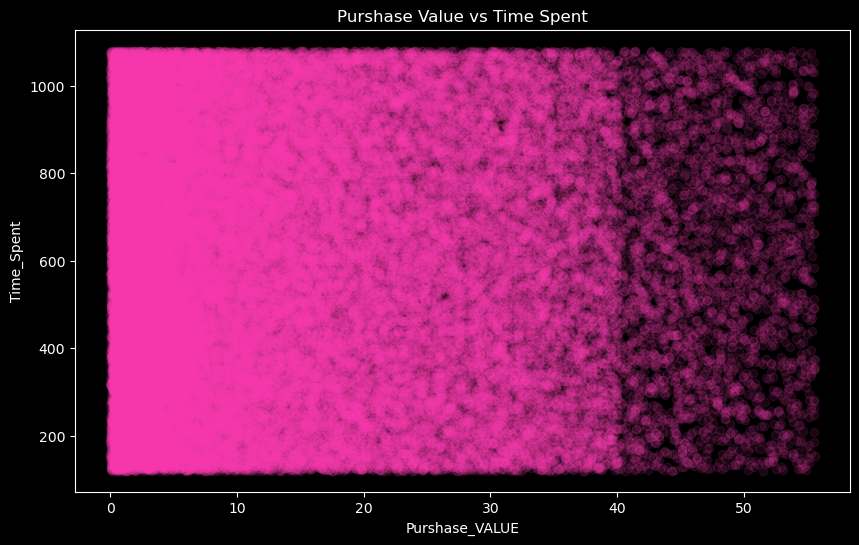

In [33]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Set line color
color = '#FF40B4'

# Create the scatter plot
plt.scatter(df['Purchase_VALUE'], df['Time_Spent'], color = color, alpha = 0.1)

# Set the axis labels
plt.xlabel('Purshase_VALUE')
plt.ylabel('Time_Spent')

# Set the title
plt.title('Purshase Value vs Time Spent')
plt.show()

## Purchase Value by Month
---

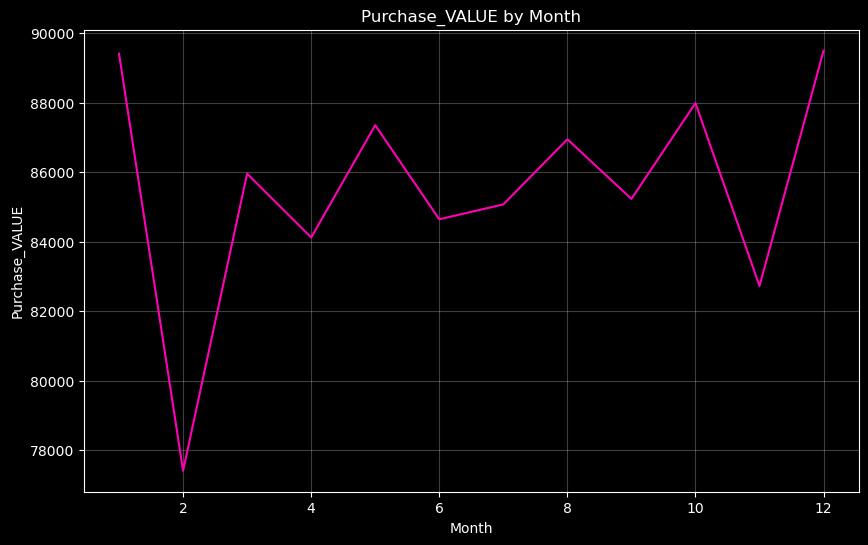

In [34]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Set line color
line_color = '#FF00B4'

# Group the data by 'Month' and the sum of 'Purchase_VALUE'
monthly_purchase_value = df.groupby('Month')['Purchase_VALUE'].sum()

# Create a line plot
plt.plot(monthly_purchase_value.index, monthly_purchase_value.values, color = line_color)

# Set the axis labels
plt.xlabel('Month')
plt.ylabel('Purchase_VALUE')

# Set the grid color
plt.grid(color = 'lightgray', alpha = 0.3)

# Set the title
plt.title('Purchase Value by Month')
plt.show()

## Revenue Total by Month
---

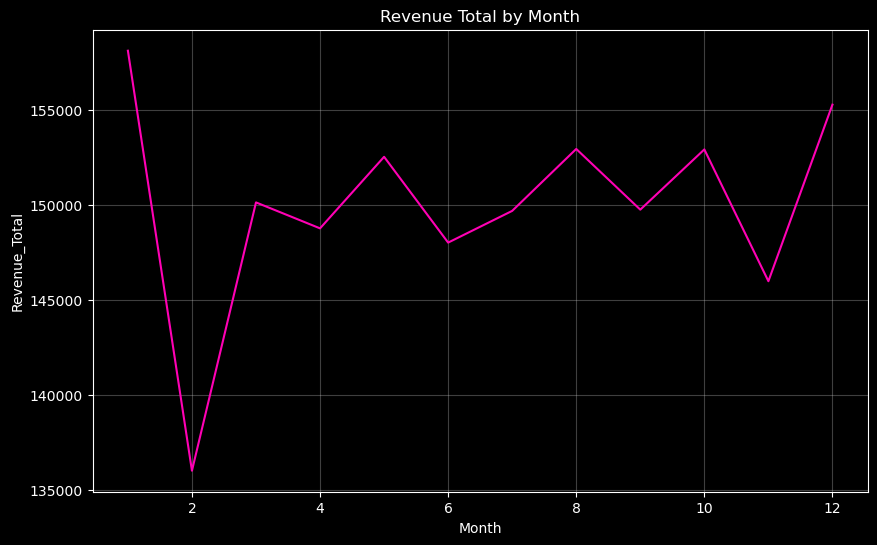

In [35]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Set line color
line_color = '#FF00B4'

# Group the data by 'Month' and the sum of 'Revenue_Total'
monthly_revenue_total = df.groupby('Month')['Revenue_Total'].sum()

# Create a line plot
plt.plot(monthly_revenue_total.index, monthly_revenue_total.values, color = line_color)

# Set the axis labels
plt.xlabel('Month')
plt.ylabel('Revenue_Total')

# Set the grid color
plt.grid(color = 'lightgray', alpha=0.3)

# Set the title
plt.title('Revenue Total by Month')

plt.show()


## Time Spent by Month
---

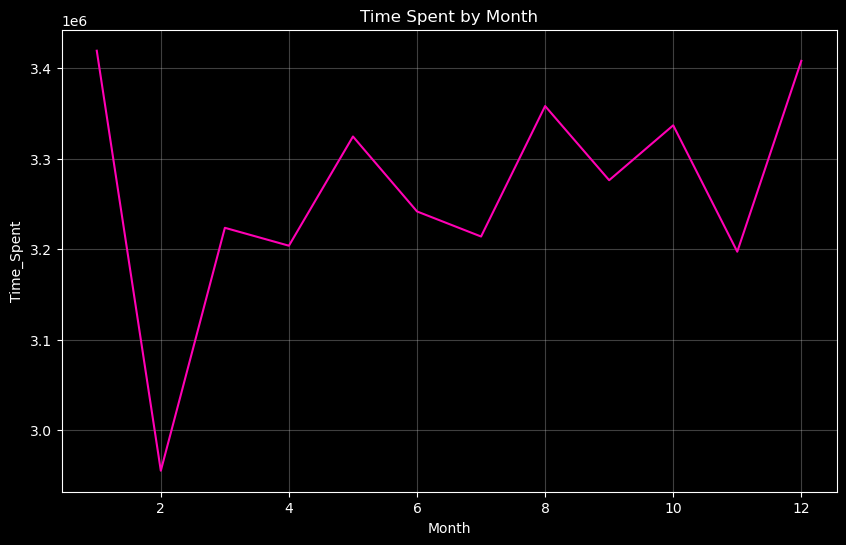

In [36]:
# Set the background color and figsize
plt.style.use('dark_background')
plt.figure(figsize = (10, 6))

# Set line color
line_color = '#FF00B4'

# Group the data by 'Month' and the sum of 'Purchase_VALUE'
monthly_purchase_value = df.groupby('Month')['Time_Spent'].sum()

# Create a line plot
plt.plot(monthly_purchase_value.index, monthly_purchase_value.values, color = line_color)

# Set the axis labels
plt.xlabel('Month')
plt.ylabel('Time_Spent')

# Set the grid color
plt.grid(color = 'lightgray', alpha = 0.3)

# Set the title
plt.title('Time Spent by Month')
plt.show()

# 📋 Insights:
---

• There are 65796 users in this dataset

• 67.1% are men and 32.9% are women

• The mean and rounded median of ages is 40

• The average data R$ will always be divided equally (either by gender, by payment method or any other), 
  this reason is due to the amount of data.
  
• The average of the total income is 27.73 and the standard deviation is 14.94

• The average purchase price is 15.96 and the standard deviation is 13.22

• Card is the most used method for purchases

• January and December are the best selling months while February is the least selling

• In media, people spend more time on the site in January and December and less time in February

• Chrome browser is used much more than any other

• 75% did not use the voucher

• 84.9% are subscribed to the Newsletter

---
# 🏁 The End! Feel free to criticize! 🏁
---